Question 1:

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import math
import random

In [2]:
m= 1000
gamma= 1.2

X1= 3*torch.rand(int(m/2),2)
X2 =3*gamma+3*torch.rand(int(m/2),2)

gamma denotes the separatibility in the data set. If gamma >1 data  is separated

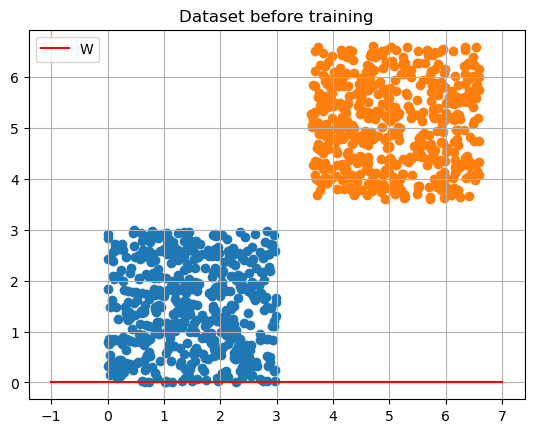

In [3]:

x = np.linspace(-1,int(3*gamma+4),100)
y = 0*x
plt.plot(x, y, '-r', label='W')
plt.title('Dataset before training')
plt.legend(loc='upper left')
plt.scatter(X1[:,0], X1[:,1])
plt.scatter(X2[:,0], X2[:,1])
plt.grid()
plt.show()

In [4]:
X=torch.empty(m,X1.size(1)+1).fill_(1)
X[:int(m/2),:2] =X1
X[int(m/2):,:2] =X2

Y=torch.empty(m,1)
Y[:int(m/2),:2] =1
Y[int(m/2):,:2] =-1

W= torch.zeros(X.size(1))

In [5]:
def perceptron(x,y,w, num_epochs=50):
  for e in range(num_epochs):
    num_updates=0
    for i in range(x.size(0)):
      if (w.dot(x[i])) * y[i] <= 0:
        w = w +  y[i] * x[i]
        num_updates+=1

    if num_updates==0:
      print(f"Stopped at epoch {e+1} with W = {w}")
      break
  
  return w

In [6]:
W= perceptron(X,Y,W)

Stopped at epoch 5 with W = tensor([-0.5094, -1.6920,  7.0000])


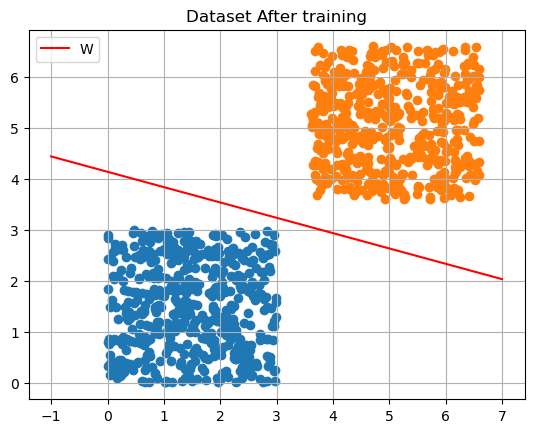

In [7]:
x = np.linspace(-1,int(3*gamma+4),100)
y = -(W[0].item()/W[1].item())*x - (W[2].item()/W[1].item())
plt.plot(x, y, '-r', label='W')
plt.title('Dataset After training')
plt.legend(loc='upper left')
plt.scatter(X1[:,0], X1[:,1])
plt.scatter(X2[:,0], X2[:,1])
plt.grid()
plt.show()

**Observations for question 1:** If the data is very close the average number of iterations required for the perceptron to converge is around 30. However, for higher values of gamma (higher separatibility ) the iterations required are low 

Question 2 Starts here: 

In [8]:
alpha= 0.8   # Learning  Rate

In [9]:
Y[:int(m/2),:2] = 0
Y[int(m/2):,:2] = 1

W= torch.rand(X.size(1))
print(W)

tensor([0.0134, 0.0280, 0.5148])


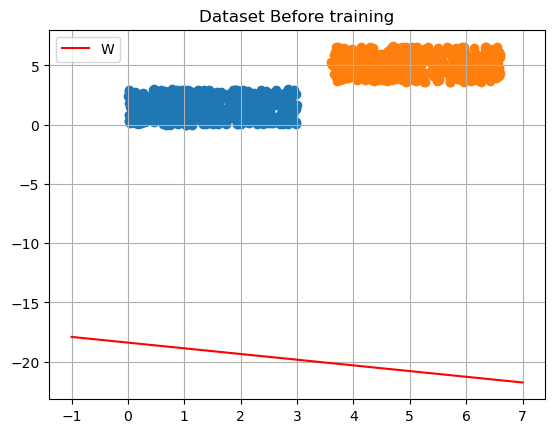

In [10]:
x = np.linspace(-1,int(3*gamma+4),100)
y = -(W[0].item()/W[1].item())*x - (W[2].item()/W[1].item())
plt.plot(x, y, '-r', label='W')
plt.title('Dataset Before training')
plt.legend(loc='upper left')
plt.scatter(X1[:,0], X1[:,1])
plt.scatter(X2[:,0], X2[:,1])
plt.grid()
plt.show()

In [11]:
def sigmoid(x):
  return 1/(1+math.exp((-x)))

def sigmoid_diff(x):
  return (sigmoid(x)*(1-sigmoid(x)))

In [12]:
def log_loss(x,y,w):
  sum = 0
  for i in range( x.size(0)):
    sum+= - ( y[i] * math.log( sigmoid (w.dot( x[i] ))) + (1 - y[i]) * math.log( 1 - sigmoid (w.dot( x[i] ))))
  
  return sum/(x.size(0))


In [13]:
def compute_gradient_ll(x, y, w):
  sum = torch.zeros( x.size(1) )
  for i in range( x.size(0) ):
    t1 = (( y[i] / ( sigmoid( w.dot( x[i] )))) * ( sigmoid_diff( w.dot( x[i] ))) * x[i] )
    t2 = (( 1 - y[i] ) / ( 1 - sigmoid( w.dot( x[i] ))) * ( sigmoid_diff( w.dot( x[i] ))) * x[i] )
    sum+= -( t1 - t2)

  sum/=  x.size(0)
  return sum


In [14]:
def gradient_descent_ll(x, y, w, nb_epochs=100):
  for e in range(nb_epochs):
    print(f"Loss is {log_loss(x,y,w).item()} at epoch no. {e+1}")
    grad = compute_gradient_ll(x,y,w)
    w = w -alpha*grad
  
  return w

In [15]:
W = gradient_descent_ll(X, Y, W)
print(W)

Loss is 0.7086789011955261 at epoch no. 1
Loss is 0.7830715179443359 at epoch no. 2
Loss is 0.9526258111000061 at epoch no. 3
Loss is 1.791261076927185 at epoch no. 4
Loss is 0.8518133759498596 at epoch no. 5
Loss is 0.5824719667434692 at epoch no. 6
Loss is 0.9402181506156921 at epoch no. 7
Loss is 0.4281019866466522 at epoch no. 8
Loss is 0.42303192615509033 at epoch no. 9
Loss is 0.45062974095344543 at epoch no. 10
Loss is 0.6577655076980591 at epoch no. 11
Loss is 0.3748260736465454 at epoch no. 12
Loss is 0.4542734920978546 at epoch no. 13
Loss is 0.38814160227775574 at epoch no. 14
Loss is 0.5706320405006409 at epoch no. 15
Loss is 0.29450610280036926 at epoch no. 16
Loss is 0.30446845293045044 at epoch no. 17
Loss is 0.29949527978897095 at epoch no. 18
Loss is 0.35751011967658997 at epoch no. 19
Loss is 0.2741585373878479 at epoch no. 20
Loss is 0.3116855323314667 at epoch no. 21
Loss is 0.25313591957092285 at epoch no. 22
Loss is 0.27662432193756104 at epoch no. 23
Loss is 0.23

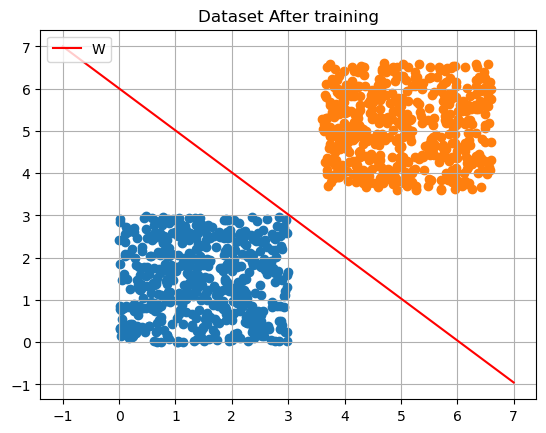

In [16]:
x = np.linspace(-1,int(3*gamma+4),100)
y = -(W[0].item()/W[1].item())*x - (W[2].item()/W[1].item())
plt.plot(x, y, '-r', label='W')
plt.title('Dataset After training')
plt.legend(loc='upper left')
plt.scatter(X1[:,0], X1[:,1])
plt.scatter(X2[:,0], X2[:,1])
plt.grid()
plt.show()

Question 3 starts here:

In [17]:
# dataset Creation
r = np.random.uniform([[0.045], [0.95]], [[0.055], [1.05]], size=(2, 500))
angle = np.linspace(0, 2 * np.pi , 500 )

X1 = [r[0] * np.cos(angle), r[0] * np.sin(angle)]
X2 = [r[1] * np.cos(angle), r[1] * np.sin(angle)]

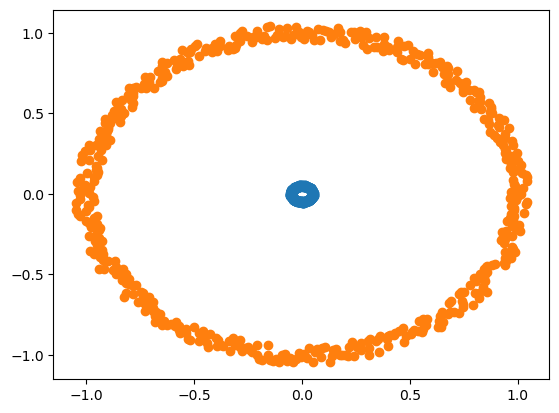

In [18]:
plt.scatter(X1[0], X1[1])
plt.scatter(X2[0], X2[1])
plt.show()

Conersion of Circular dataset to tensors

In [19]:
X1= np.array(X1)
X2= np.array(X2)

X1 = torch.Tensor(X1)
X2 = torch.Tensor(X2)

X1 = X1.T
X2 = X2.T
X=torch.empty(m,X1.size(1))
X[:int(m/2),:2] =X1
X[int(m/2):,:2] =X2

Y=torch.empty(m,1)
Y[:int(m/2),:2] =0
Y[int(m/2):,:2] =1

In [20]:
def RELU(x):
  return max(0,x)

def  RELU_diff(x):
  if(x<0):
    return 0
  else:
    return 1

In [21]:
def elem_wise_sigmoid(x):
  for i in range(x.size(0)):
    x[i] = sigmoid(x[i])
  
  return x

def elem_wise_sigmoid_diff(x):
  for i in range(x.size(0)):
    x[i] = sigmoid_diff(x[i])
  
  return x

def elem_wise_relu(x):
  for i in range(x.size(0)):
    x[i] = RELU(x[i])
  
  return x

def elem_wise_relu_diff(x):
  for i in range(x.size(0)):
    x[i] = RELU_diff(x[i])
  
  return x

def ll_grad(aL, y):
  sum = torch.zeros(aL.size(0))
  for i in range(aL.size(0)):
    sum[i] = - (( y[i] / aL[i] ) -  (( 1 - y[i]) / ( 1- aL[i]) ))
  
  return sum

Main Class for the MLP

In [22]:
class MLP:
  def __init__(self, num_layers, dims):
    self.num_layers = num_layers
    self.dims = dims

  def init_params(self):
    self.params = []
    for  i in range(self.num_layers -1 ):
      w = torch.rand(self.dims[i+1], self.dims[i])
      b = torch.rand( self.dims[i+1].item(),1)
      self.params.append([w,b])
  
  def backProp(self, x, y ):
    acts = [x]
    weighted_inputs = []
    grad_w = []
    grad_b = []

    # Forward Pass
    for layer in range(self.num_layers-1):
      w = self.params[layer][0]
      b = self.params[layer][1]

      s = w @ acts[layer] + b.T    # sl = wl*xl-1 + bl
      s = s.T
      weighted_inputs.append(s) 
      if(layer == self.num_layers-2):
        a = elem_wise_sigmoid(s)
      else:
        a = elem_wise_relu(s)

      acts.append(a)


    # Output error calculation

    aL = acts[self.num_layers - 1]
    zL = weighted_inputs[self.num_layers - 2]
    t1 = ll_grad(aL, y)
    t2 = elem_wise_sigmoid_diff( zL )
    output_error = torch.mul(t1, t2)


    shp = self.params[self.num_layers - 2][0].size()
    gw = torch.zeros(shp)
    for j in range(shp[0]):
      for k in range(shp[1]):
        gw[j][k] = acts[self.num_layers - 2][k] * output_error[j]
    
    grad_w.append(gw)
    grad_b.append(output_error)


    # Backpropagating the error

    prev_error = output_error
    for  layer in range(self.num_layers - 3, -1, -1):
      w_next_layer = self.params[layer+1][0]
      t1 = ((w_next_layer).T) @ prev_error

      t2 = elem_wise_relu_diff( weighted_inputs[layer] )
      error = torch.mul(t1,t2)
      
      shp = self.params[layer][0].size()
      
      gw = torch.zeros(shp)
      for j in range(shp[0]):
        for k in range(shp[1]):
          gw[j][k] = acts[layer][k] * error[j]

      grad_w.append(gw)
      grad_b.append(error)
      prev_error = error

    grad_w.reverse()
    grad_b.reverse()

    return (grad_w, grad_b)


  def predict(self, x):
    acts = [x]
    weighted_inputs = []

    # Forward Pass

    for layer in range(self.num_layers-1):
      w = self.params[layer][0]
      b = self.params[layer][1]

      s = w @ acts[layer] + b.T    # sl = wl*xl-1 + bl
      s = s.T
      weighted_inputs.append(s) 
      if(layer == self.num_layers-2):
        a = elem_wise_sigmoid(s)
      else:
        a = elem_wise_relu(s)
      acts.append(a)
    
    aL = acts[self.num_layers - 1]
    if(aL<=0.5):
      return 0
    elif( aL<=1):
      return 1
    else :
      print("Misclassification")
      return -1

  def gradient_descent(self, x, y, nb_epochs= 300, batch_size = 100, alpha = 0.05):
    
    for e in range(nb_epochs):
      delta_w = []
      delta_b = []
      for  i in range(self.num_layers -1 ):
        w = torch.zeros(self.dims[i+1], self.dims[i])
        b = torch.zeros( self.dims[i+1].item(),1)
        delta_w.append(w)
        delta_b.append(b)

      for i in random.sample(range( x.size(0)), batch_size):
        grad_w, grad_b = self.backProp( x[i], y[i])

        for  layer in range(self.num_layers -1 ):
          delta_w[layer]+= grad_w[layer]
          delta_b[layer]+= grad_b[layer]


      for layer in range(self.num_layers-1):
        w = self.params[layer][0] 
        b = self.params[layer][1] 

        w = w - alpha * (delta_w[layer])/batch_size
        b = b - alpha * (delta_b[layer])/batch_size

        self.params[layer][0] = w
        self.params[layer][1] = b

      correct0 = 0
      correct1 =0
      for i in range(1000):
        if(y[i] == self.predict(x[i]) and y[i]==0):
          correct0+=1
        elif(y[i] == self.predict(x[i]) and y[i]==1):
          correct1+=1

      accuracy = ((correct0+correct1)/1000)*100
      if(accuracy >= 75):
        print(f"Gradient descent stopped at iteration {e} with accuracy = {accuracy}%")
        break

      print(f"At Epoch no. {e+1}, accuracy = {accuracy}%") 
      print(f"correct0 = {correct0} and correct1 = {correct1}")

In [23]:
# Creating MLP

print("Q3 : ")
d = torch.tensor([2,5,1])
mlp = MLP(3, d)
mlp.init_params()
mlp.gradient_descent(X,Y)

Q3 : 
At Epoch no. 1, accuracy = 50.0%
correct0 = 0 and correct1 = 500
At Epoch no. 2, accuracy = 50.0%
correct0 = 0 and correct1 = 500
At Epoch no. 3, accuracy = 50.0%
correct0 = 0 and correct1 = 500
At Epoch no. 4, accuracy = 50.0%
correct0 = 0 and correct1 = 500
At Epoch no. 5, accuracy = 50.0%
correct0 = 0 and correct1 = 500
At Epoch no. 6, accuracy = 50.0%
correct0 = 0 and correct1 = 500
At Epoch no. 7, accuracy = 50.0%
correct0 = 0 and correct1 = 500
At Epoch no. 8, accuracy = 50.0%
correct0 = 0 and correct1 = 500
At Epoch no. 9, accuracy = 50.0%
correct0 = 0 and correct1 = 500
At Epoch no. 10, accuracy = 50.0%
correct0 = 0 and correct1 = 500
At Epoch no. 11, accuracy = 50.0%
correct0 = 0 and correct1 = 500
At Epoch no. 12, accuracy = 50.0%
correct0 = 0 and correct1 = 500
At Epoch no. 13, accuracy = 50.0%
correct0 = 0 and correct1 = 500
At Epoch no. 14, accuracy = 50.0%
correct0 = 0 and correct1 = 500
At Epoch no. 15, accuracy = 50.0%
correct0 = 0 and correct1 = 500
At Epoch no. 

**Observations from MLP** : The  classifier starts with the initial accuracy of 50% i.e all the points corresponding to label 1 are classified correctly. This happens upto iteration 50 on an average, and the parameters keep on adjusting themselves to accomodate label 0. After some iterations, accuracy begins to drop upto 40% as parameters begin to account for label 0. However soon the accuracy climbs up as the parameters now capture both of the labels. 
The algorithm stops after hitting above 75% accuracy.